# Import Required Libraries
Import the necessary libraries, including the SphericalHarmonics class from spherical.py.

In [1]:
import sys
sys.path.append('../')
import spharpy 
import spharpy.spherical as sh
from spharpy.samplings import gaussian
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colorbar import Colorbar

In [22]:
def plot_basis_functions(Y, sampling, n_max=2, title= "", Ymag = None):
    fig = plt.figure(figsize=(12, 8))
    gs = plt.GridSpec(4, 5, height_ratios=[1, 1, 1, 0.1], width_ratios=[1, 1, 1, 1, 1])
    for acn in range((n_max+1)**2):
        n, m = spharpy.spherical.acn2nm(acn)
        idx_m = int(np.floor(n_max/2+1)) + m
        ax = plt.subplot(gs[n, idx_m], projection='3d')
        balloon = spharpy.plot.balloon_wireframe(sampling, Y[:, acn], phase=True, show=False, colorbar=False, ax=ax)
        if Ymag is not None:
            ymag_str = "{:.2f}".format(Ymag[:, acn].max())
            ax.set_title('$Y_{' + str(n) + '}^{' + str(m) + '}(\\theta, \\phi)$ - max: ' + ymag_str + ' ')
        else:
            ax.set_title('$Y_{' + str(n) + '}^{' + str(m) + '}(\\theta, \\phi)$')
        plt.axis('off')
    cax = plt.subplot(gs[n_max+1, :])

    cnorm = plt.Normalize(0, 2*np.pi)
    cmappable = mpl.cm.ScalarMappable(cnorm, spharpy.plot.phase_twilight())
    cmappable.set_array(np.linspace(0, 2*np.pi, 128))

    cb = Colorbar(ax=cax, mappable=cmappable, orientation='horizontal', ticklocation='bottom')
    cb.set_label('Phase in rad')
    cb.set_ticks(np.linspace(0, 2*np.pi, 5))
    cb.set_ticklabels(['$0$', '$\pi/2$', '$\pi$', '$3\pi/2$', '$2\pi$'])
    plt.suptitle(title)

# Normalization Conventions
Showcase the different normalization conventions (N3D, SN3D, MaxN) used in the SphericalHarmonics class.

Normalization: sn3d, Channel Convention: acn
Normalization: sn3d, Channel Convention: fuma
Normalization: n3d, Channel Convention: acn
Normalization: n3d, Channel Convention: fuma
Normalization: maxn with Channel Convention: acn is not supported
Normalization: maxn with Channel Convention: fuma is not supported


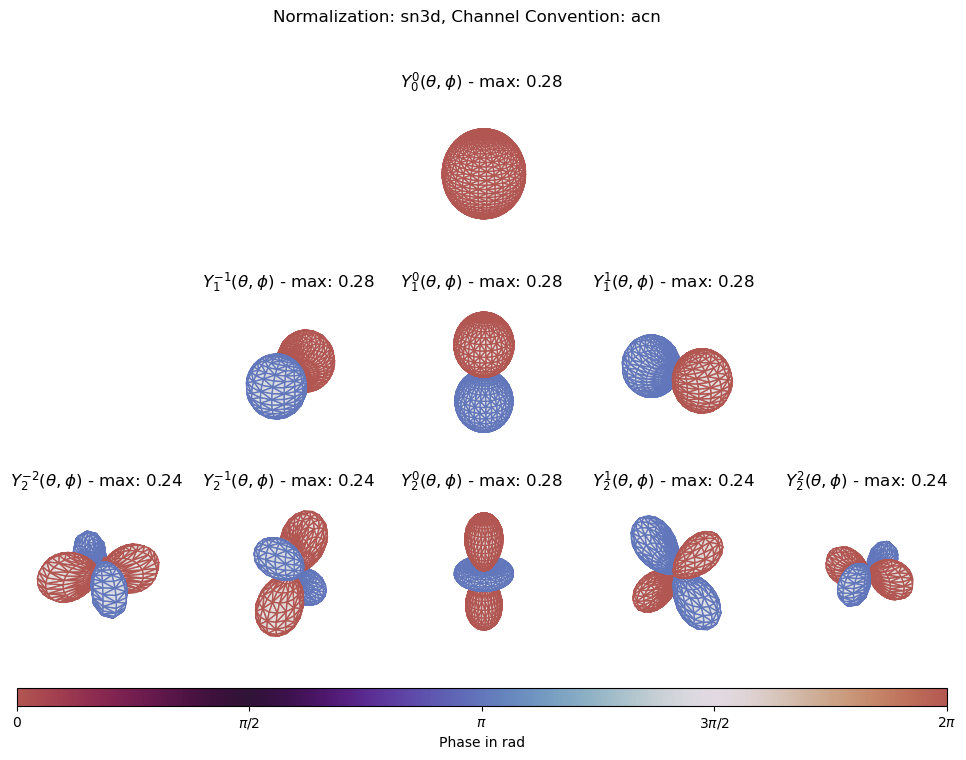

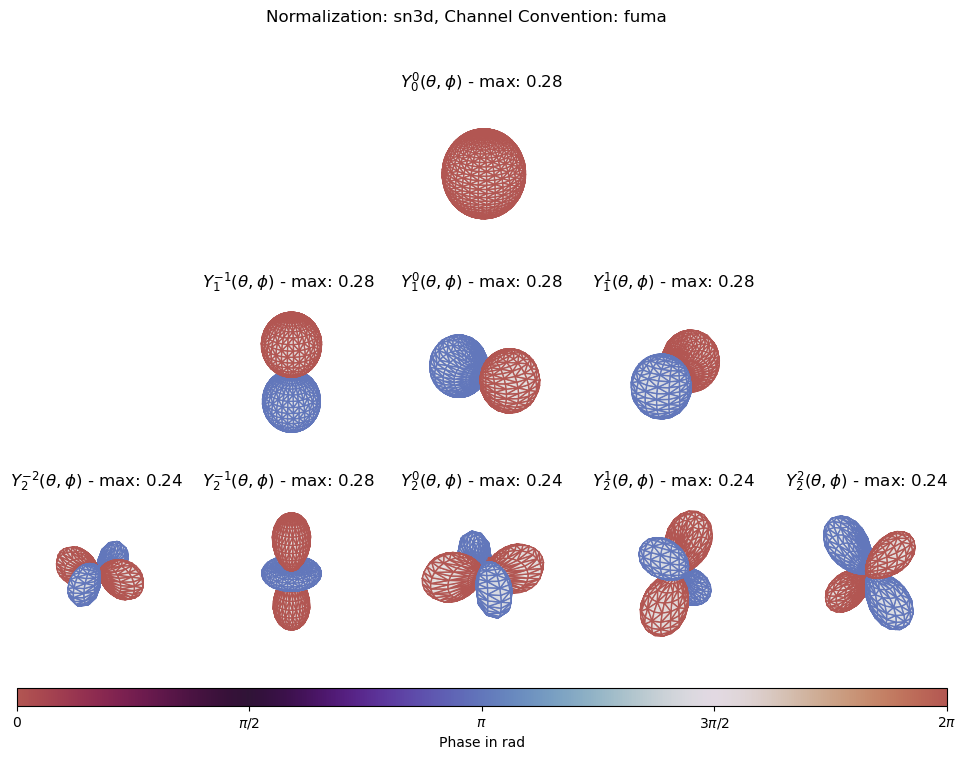

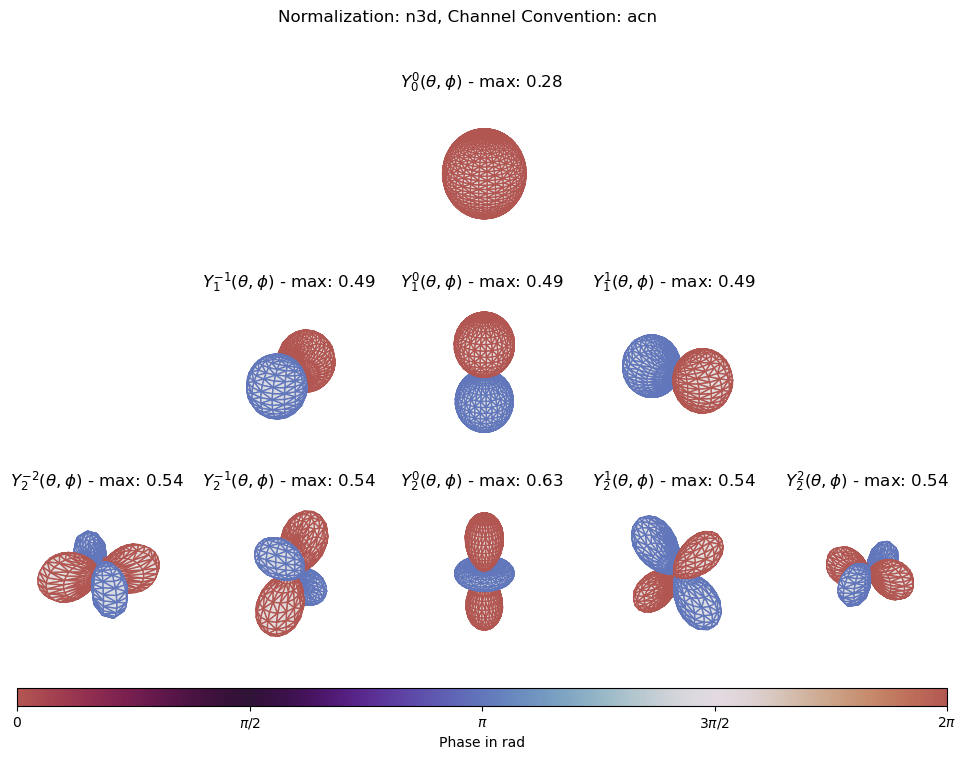

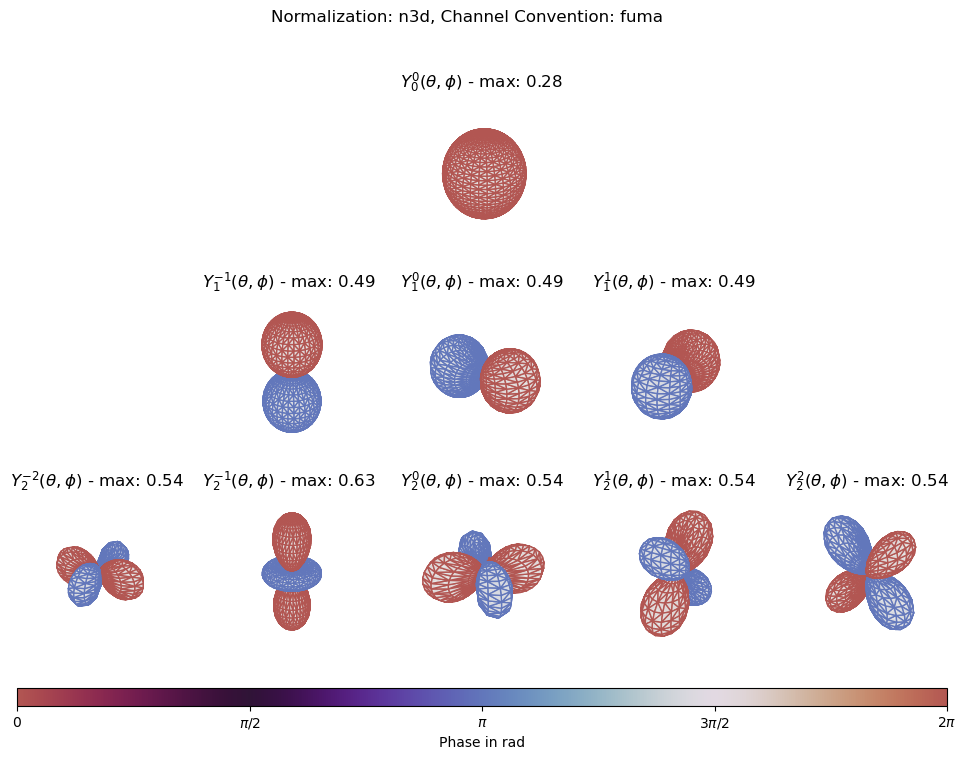

In [24]:


coordinates = gaussian(n_points= 32)
normalizations = ["sn3d", "n3d", "maxn"]
channel_conv = ["acn", "fuma"]
# Initialize SphericalHarmonics with n_max = 3
n_max = 3
for normalization in normalizations:
    for channel in channel_conv:
        try:
            SH = sh.SphericalHarmonics(n_max, coordinates, basis_type="real", channel_convention=channel, normalization=normalization)
            Y = SH.basis
            Y_mag = np.abs(Y)
            print(f"Normalization: {normalization}, Channel Convention: {channel}")
            plot_basis_functions(Y, coordinates, 2, title=f"Normalization: {normalization}, Channel Convention: {channel}", Ymag = Y_mag)
        except Exception as e:
            print(f"Normalization: {normalization} with Channel Convention: {channel} is not supported")
            # print(e)

# Phase Conventions
Showcase the phase conventions used in the SphericalHarmonics class.